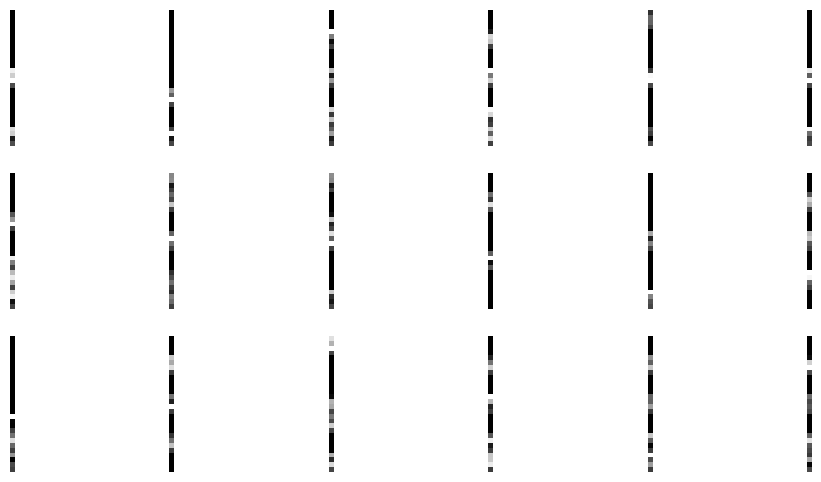

In [8]:
from __future__ import print_function
import struct
import numpy as np
import matplotlib.pyplot as plt

# command line looks like: python3 reduce.py –d input/10k_images.dat -q input/100from60k.dat -od input/10k_images_REDUCED.dat -oq input/100from60k_REDUCED.dat

# Function to read MNIST data from file


def read_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        # Read magic number, number of images, rows, and columns
        magic_number, num_images, rows, cols = struct.unpack(
            '>IIII', f.read(16))

        # Read image data
        image_size = rows * cols
        images = np.frombuffer(f.read(image_size * num_images), dtype=np.uint8)
        images = images.reshape(num_images, rows, cols)

    return images


# Paths to your MNIST-like files
file_path1 = 'input/10k_images_REDUCED.dat'
file_path2 = 'input/100from60k_REDUCED.dat'

# Read data from the files
data1 = read_mnist_images(file_path1)
data2 = read_mnist_images(file_path2)

# Display 9 random images from each dataset
fig, ax = plt.subplots(3, 6, figsize=(12, 6))
for i in range(3):
    for j in range(6):
        if j < 3:
            ax[i, j].imshow(
                data1[np.random.randint(0, len(data1))], cmap='gray')
        else:
            ax[i, j].imshow(
                data2[np.random.randint(0, len(data2))], cmap='gray')
        ax[i, j].axis('off')
plt.show()

4/4 [==============================] - 0s 129ms/step


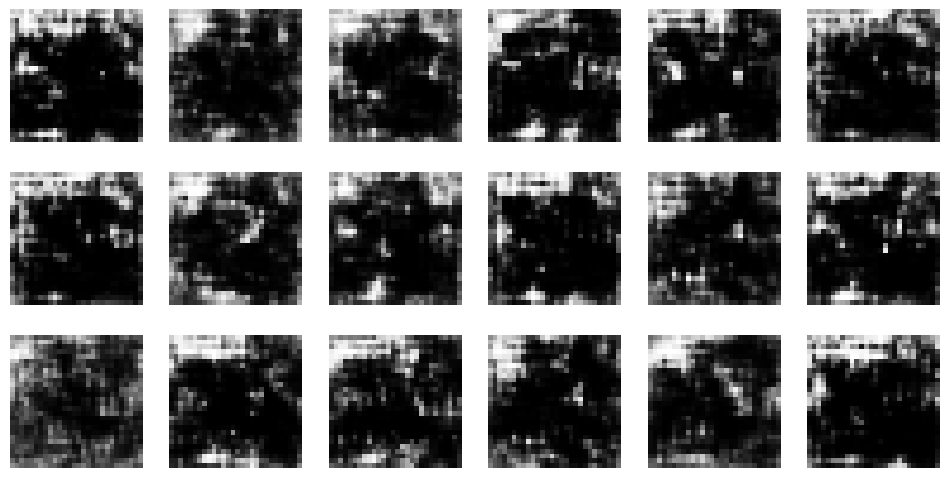

In [9]:
# convert the data to float32
data1 = data1.astype(np.float32)
data2 = data2.astype(np.float32)

# normalize the data to range [0, 1]
data1 /= 255
data2 /= 255

# load the decoder model
from keras.models import load_model
decoder = load_model('decoder.h5')

# decode the data
decoded1 = decoder.predict(data1)
decoded2 = decoder.predict(data2)

#restore the data to range [0, 255]
decoded1 *= 255
decoded2 *= 255

# convert the data to uint8
decoded1 = decoded1.astype(np.uint8)
decoded2 = decoded2.astype(np.uint8)

# Display 9 random images from each dataset
fig, ax = plt.subplots(3, 6, figsize=(12, 6))
for i in range(3):
    for j in range(6):
        if j < 3:
            ax[i, j].imshow(
                decoded1[np.random.randint(0, len(decoded1))], cmap='gray')
        else:
            ax[i, j].imshow(
                decoded2[np.random.randint(0, len(decoded2))], cmap='gray')
        ax[i, j].axis('off')
plt.show()